In [100]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder


# algorithms

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier

# ensemble learning
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

# metrics
from sklearn import  metrics
from sklearn.model_selection import GridSearchCV

import scipy.stats as ss
from glob import glob

# suppress anoying warnings
import warnings
warnings.filterwarnings("ignore")



In [24]:
# creating list of files

cars_files = sorted(glob('C:\\Users\\dell\\Desktop\\cars\\*.csv'))

In [25]:
# checking

cars_files

['C:\\Users\\dell\\Desktop\\cars\\audi.csv',
 'C:\\Users\\dell\\Desktop\\cars\\bmw.csv',
 'C:\\Users\\dell\\Desktop\\cars\\cclass.csv',
 'C:\\Users\\dell\\Desktop\\cars\\focus.csv',
 'C:\\Users\\dell\\Desktop\\cars\\ford.csv',
 'C:\\Users\\dell\\Desktop\\cars\\hyundi.csv',
 'C:\\Users\\dell\\Desktop\\cars\\merc.csv',
 'C:\\Users\\dell\\Desktop\\cars\\skoda.csv',
 'C:\\Users\\dell\\Desktop\\cars\\toyota.csv',
 'C:\\Users\\dell\\Desktop\\cars\\vauxhall.csv',
 'C:\\Users\\dell\\Desktop\\cars\\vw.csv']

In [26]:
# list of brands

cars_brands = ['audi','bmw','mercedes','ford1','ford', 'hyundai', 'mercedes1','skoda','toyota','vauxhall','vw']
    

In [27]:
# creating dict with car brand and car file

cars_names_files = dict(zip(cars_brands,cars_files))

In [28]:
# checking

cars_names_files

{'audi': 'C:\\Users\\dell\\Desktop\\cars\\audi.csv',
 'bmw': 'C:\\Users\\dell\\Desktop\\cars\\bmw.csv',
 'mercedes': 'C:\\Users\\dell\\Desktop\\cars\\cclass.csv',
 'ford1': 'C:\\Users\\dell\\Desktop\\cars\\focus.csv',
 'ford': 'C:\\Users\\dell\\Desktop\\cars\\ford.csv',
 'hyundai': 'C:\\Users\\dell\\Desktop\\cars\\hyundi.csv',
 'mercedes1': 'C:\\Users\\dell\\Desktop\\cars\\merc.csv',
 'skoda': 'C:\\Users\\dell\\Desktop\\cars\\skoda.csv',
 'toyota': 'C:\\Users\\dell\\Desktop\\cars\\toyota.csv',
 'vauxhall': 'C:\\Users\\dell\\Desktop\\cars\\vauxhall.csv',
 'vw': 'C:\\Users\\dell\\Desktop\\cars\\vw.csv'}

In [29]:
# concat together all brands in one big dataframe
# one file has different columns name, we change it tax(£) for tax

all_data = pd.DataFrame()
for brand, file in cars_names_files.items():
    car_file = pd.read_csv(file)
    car_file['brand'] = brand
    if np.any(car_file.columns=='tax(£)'):
        car_file = car_file.rename(columns={'tax(£)':'tax'})
    all_data = pd.concat([all_data,car_file], ignore_index=True)

In [30]:
# we have brand mercedes and mercedes1, ford and ford1, we change it for mercedes and ford

all_data['brand']=np.where(all_data['brand']=='ford1','ford', all_data['brand'])

all_data['brand']=np.where(all_data['brand']=='mercedes1','mercedes', all_data['brand'])

In [31]:
# checking first 5 rows 

all_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


In [32]:
# shufle data is a good practice when order is not important

all_data = all_data.sample(frac=1).reset_index(drop=True)

In [11]:
# let's check now

all_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,Up,2016,6495,Manual,41000,Petrol,20.0,61.4,1.0,vw
1,Grandland X,2019,15798,Manual,15127,Diesel,145.0,56.5,1.5,vauxhall
2,1 Series,2016,13950,Semi-Auto,40000,Diesel,20.0,67.3,2.0,bmw
3,Astra,2018,12799,Manual,19592,Diesel,145.0,72.4,1.6,vauxhall
4,4 Series,2019,23895,Semi-Auto,5630,Diesel,145.0,65.7,2.0,bmw


In [82]:
# checking the size 

all_data.shape

(108540, 10)

In [78]:
# checking columns type and missing values (we see missing values in columns :tax, mpg)

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   brand         108540 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


In [12]:
# checking missing values 

missing_values = all_data.isna().sum()
missing_values[missing_values>0]

tax    9353
mpg    9353
dtype: int64

In [91]:
# unique values per column

for column in all_data:
    print(f'{column} - {len(all_data[column].unique())}')
    print(all_data[column].unique())
    print()

model - 195
[' EcoSport' ' Meriva' ' Tucson' ' Up' ' Corsa' ' A Class' ' C Class'
 ' Polo' ' Octavia' ' Q7' ' Kuga' ' Q3' ' Q2' ' 1 Series' ' A1' ' S-MAX'
 ' Tiguan' ' Focus' ' Astra' ' Golf' ' T-Roc' ' Fabia' ' E Class' ' X3'
 ' Grand C-MAX' ' Ioniq' ' X2' ' Aygo' ' C-MAX' ' Fiesta' ' A5' ' Galaxy'
 ' Mondeo' ' T-Cross' ' Yeti Outdoor' ' A4' ' 3 Series' ' Mokka X'
 ' Yaris' ' I10' ' Citigo' ' GLA Class' ' RAV4' ' R8' ' A3' ' I30' ' Kona'
 ' Adam' ' Golf SV' ' Mokka' ' Insignia' ' Santa Fe' ' Scala' ' GLE Class'
 ' X7' ' M Class' ' B Class' ' Combo Life' ' 5 Series' ' 7 Series'
 ' 4 Series' ' Q8' ' RS5' ' KA' ' CLS Class' ' TT' ' X4' ' Kamiq'
 ' GLB Class' ' Superb' ' RS6' ' Touran' ' Kodiaq' ' B-MAX' ' Sharan'
 ' Zafira' ' 6 Series' ' V Class' ' Corolla' ' C-HR' ' Q5' ' CL Class'
 ' Crossland X' ' Auris' ' 2 Series' ' Edge' ' Grandland X' ' A8'
 ' SL CLASS' ' Passat' ' Scirocco' ' X-CLASS' ' Ka+' ' GL Class' ' X5'
 ' GLC Class' ' X1' ' Yeti' ' Rapid' ' Z4' ' IX20' ' Touareg'
 ' Zafira

In [33]:
# numeric columns 

numeric_columns = all_data.select_dtypes(include=np.number).columns
numeric_columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

Column: year
Unique values: 29


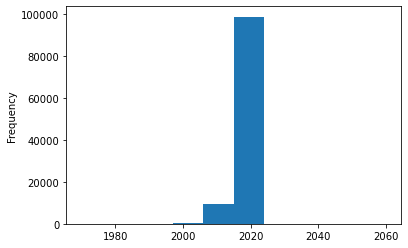

Column: price
Unique values: 13299


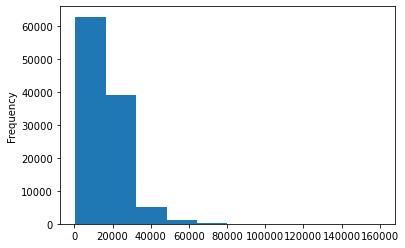

Column: mileage
Unique values: 42314


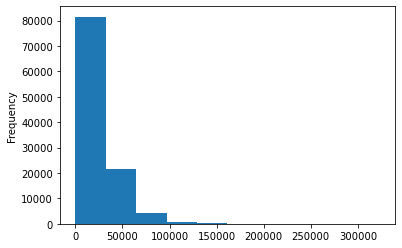

Column: tax
Unique values: 49


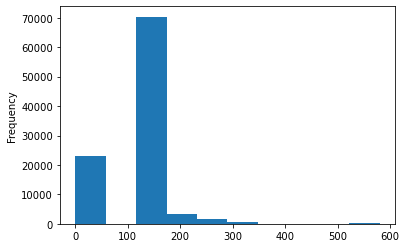

Column: mpg
Unique values: 209


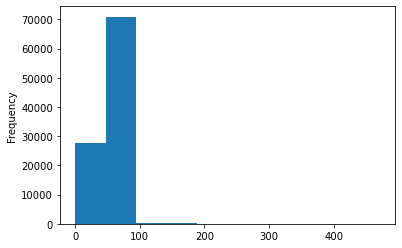

Column: engineSize
Unique values: 42


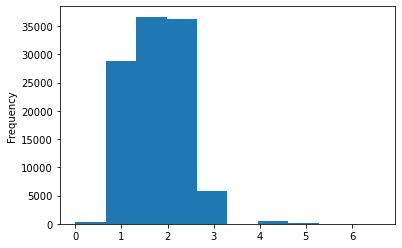

In [96]:
for column in numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(all_data[column].unique())}')
    all_data[column].plot.hist(bins=10)
    plt.show()

In [34]:
# non numeric columns

non_numeric_columns = all_data.select_dtypes(exclude=np.number).columns
non_numeric_columns

Index(['model', 'transmission', 'fuelType', 'brand'], dtype='object')

Column: model
Unique values: 195


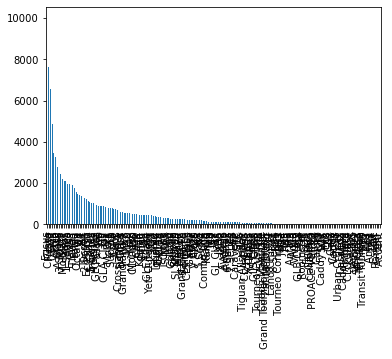

Column: transmission
Unique values: 4


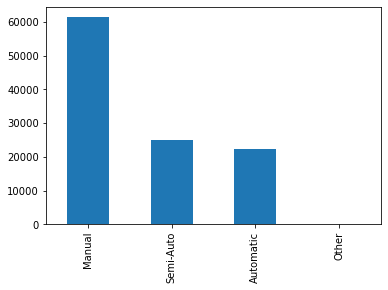

Column: fuelType
Unique values: 5


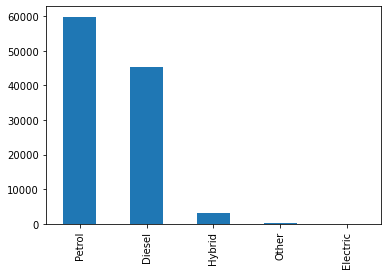

Column: brand
Unique values: 9


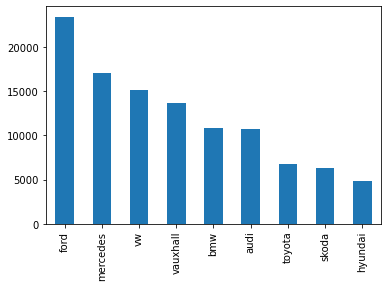

In [98]:
for column in non_numeric_columns:
    print(f'Column: {column}')
    print(f'Unique values: {len(all_data[column].unique())}')
    all_data[column].value_counts().plot.bar()
    plt.show()

In [99]:
# showing basic statistics it is strange that enginesize min value=0 and year is 2060

all_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [156]:
# let's check enginesize

all_data[all_data['engineSize']==0.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
49,Tucson,2016,11300,Manual,37993,Diesel,30.0,61.7,0.0,hyundai
540,A Class,2018,18000,Automatic,18347,Diesel,150.0,65.7,0.0,mercedes
1289,i3,2017,18995,Automatic,33021,Hybrid,0.0,470.8,0.0,bmw
1391,Fiesta,2018,12999,Manual,15000,Petrol,150.0,58.9,0.0,ford
1797,Fiesta,2017,9275,Automatic,34000,Petrol,0.0,57.7,0.0,ford
...,...,...,...,...,...,...,...,...,...,...
107056,Focus,2019,19999,Manual,3000,Petrol,NaN,NaN,0.0,ford
107513,Passat,2018,19500,Automatic,22283,Petrol,145.0,48.7,0.0,vw
107902,M Class,1970,24999,Automatic,14000,Diesel,305.0,39.2,0.0,mercedes
107955,I10,2016,6300,Manual,17272,Petrol,20.0,61.4,0.0,hyundai


In [157]:
# let's check year

all_data['year'].quantile([0.95,0.99, 1])

0.95    2019.0
0.99    2020.0
1.00    2060.0
Name: year, dtype: float64

In [158]:
# one row

all_data[all_data['year']==2060.0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
64464,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4,ford


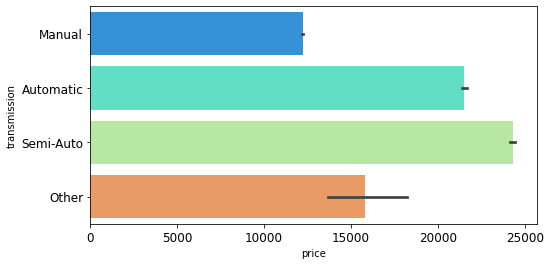

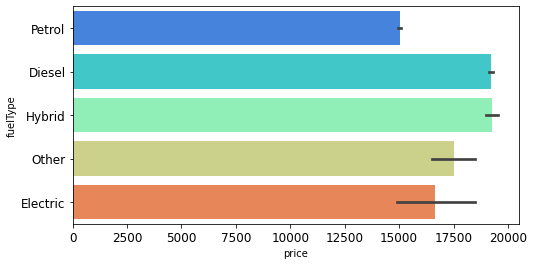

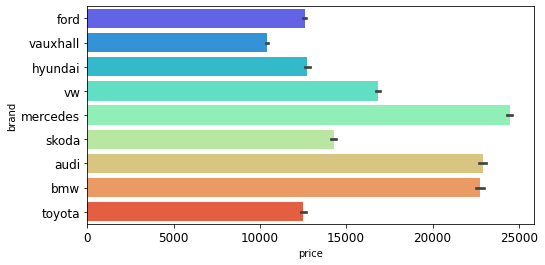

In [109]:
# plotting the relations between non numeric features and price

for column in non_numeric_columns[1:]:
    fig = plt.figure(figsize = (8,4))
    sns.barplot(x = all_data['price'], y = all_data[column], data = all_data, palette='rainbow')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()




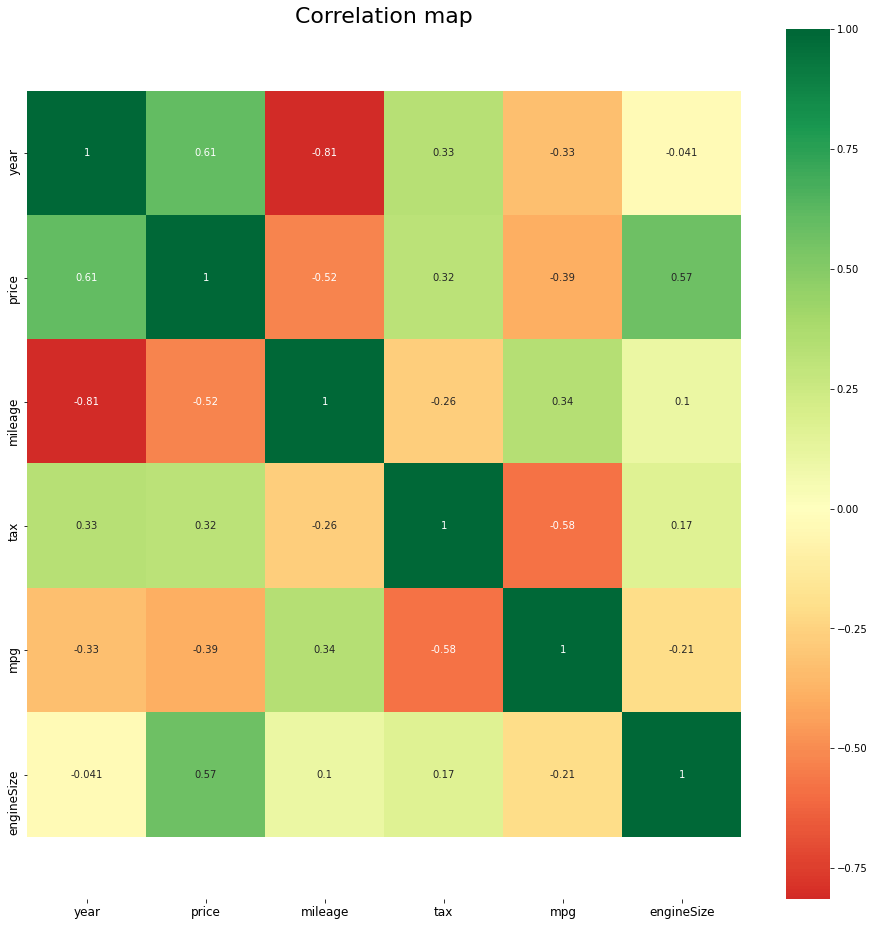

In [110]:
# plotting correlation beetwen features using Spearman method 

plt.figure(figsize=(16, 16))
ax = sns.heatmap(all_data.corr(method='spearman'), 
                 xticklabels=all_data.corr().columns, 
                 yticklabels=all_data.corr().columns, 
                 cmap='RdYlGn', 
                 center=0, 
                 annot=True)

plt.title('Correlation map', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Conclusions

We have missing values tax 9353, mpg 9353, tax nan change for 0.0, mpg nan for median
We have 286 rows where enginesize is 0? - we will delete it 
we have 1 row where year is 2060 - we will delete it

Year - we will create new column age instead





In [35]:
# filter data, to save onlyrows where year is not 2060

all_data = all_data[all_data.year!= 2060]

In [36]:
# let's check

np.max(all_data.year)

2020

In [37]:
# add new column age and delete column year

all_data['age'] = 2021.0-all_data['year']

In [18]:
all_data.drop('year', axis=1, inplace=True)

In [38]:
# deleting rows with enginesize is 0

all_data = all_data[all_data['engineSize']!=0.0]

In [40]:
# let's check 


all_data.reset_index(drop=True, inplace=True)


In [41]:
all_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
0,Fiesta,2019,14550,Manual,10071,Petrol,145.0,60.1,1.0,ford,2.0
1,Focus,2017,14000,Automatic,9137,Petrol,NaN,NaN,1.0,ford,4.0
2,A Class,2020,24889,Semi-Auto,1000,Diesel,145.0,62.8,1.5,mercedes,1.0
3,Golf,2020,20605,Manual,1910,Diesel,145.0,57.7,1.6,vw,1.0
4,Tucson,2017,13995,Manual,27237,Diesel,30.0,61.7,1.7,hyundai,4.0
...,...,...,...,...,...,...,...,...,...,...,...
108248,Insignia,2015,8495,Automatic,57000,Diesel,145.0,53.3,2.0,vauxhall,6.0
108249,Focus,2018,12400,Manual,21264,Petrol,NaN,NaN,1.0,ford,3.0
108250,5 Series,2017,20998,Semi-Auto,21068,Diesel,145.0,62.8,2.0,bmw,4.0
108251,Insignia,2016,11500,Manual,17052,Diesel,30.0,65.7,1.6,vauxhall,5.0


In [42]:
# fill NaN in tax column NaN->0

all_data.tax=all_data.tax.fillna(0.0)

In [43]:
# fill Nan in mpg column  NaN-> median

all_data.mpg = all_data.mpg.fillna(np.nanmedian(all_data.mpg))

In [44]:
# let's check now

all_data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
brand           0
age             0
dtype: int64

In [ ]:
# seperate the dataset : response variable (y) and feature variabes (X)

X = all_data.drop('price', axis = 1)
y = all_data['price']

In [55]:
# let's transmission , fuelType, brand, model in categoricals values

def map_fuelType(fuel):
    d = {'Petrol': 1, 
        'Diesel': 2, 
        'Hybrid': 3, 
        'Electric': 3, 
        'Other': 3}
    return d[fuel]
    
all_data['fuelType_main'] = all_data['fuelType'].apply(lambda x: map_fuelType(x))



In [64]:
def map_transmission(trans):
    d = {'Manual': 1, 
        'Automatic': 2, 
        'Semi-Auto': 3, 
        'Other': 4}
    return d[trans]
    
all_data['transmission_main'] = all_data['transmission'].apply(lambda x: map_transmission(x))

In [68]:
def map_brand(brand):
    d = {'mercedes': 1, 
        'audi': 2, 
        'bmw': 3,
        'ford': 4,
        'vw': 5,
        'vauxhall': 6,
        'toyota': 7,
        'skoda': 8,
        'hyundai': 9}
    return d[brand]
    
all_data['brand_main'] = all_data['brand'].apply(lambda x: map_brand(x))

In [72]:
# drop brand, transmission, fuelType



all_data.drop(['brand','transmission','fuelType','year'],axis=1, inplace=True)

In [76]:
# change model column for categories no using get_dummies

all_data_expanded = pd.get_dummies(all_data)
all_data_expanded.head()

,price,mileage,tax,mpg,engineSize,age,fuelType_main,transmission_main,brand_main,model_ 1 Series,...,model_ Yeti Outdoor,model_ Z3,model_ Z4,model_ Zafira,model_ Zafira Tourer,model_ i3,model_ i8,model_180,model_200,model_220
0,14550,10071,145.0,60.1,1.0,2.0,1,1,4,0,...,0,0,0,0,0,0,0,0,0,0
1,14000,9137,0.0,54.3,1.0,4.0,1,2,4,0,...,0,0,0,0,0,0,0,0,0,0
2,24889,1000,145.0,62.8,1.5,1.0,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,20605,1910,145.0,57.7,1.6,1.0,2,1,5,0,...,0,0,0,0,0,0,0,0,0,0
4,13995,27237,30.0,61.7,1.7,4.0,2,1,9,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# seperate the dataset : response variable (y) and feature variabes (X)

X = all_data_expanded.drop('price', axis = 1)
y = all_data_expanded['price']

In [80]:
# splitting data into train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
# Setting model Ridge with default parameters 


model = make_pipeline(StandardScaler(), Ridge())
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test =  model.predict(X_test)
print("Score train data: {}".format(model.score(X_train,y_train)))
print("Score test data: {}".format(model.score(X_test,y_test)))
print("Mean absolute errors train data: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("Mean absolute errors test data: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean squared error train data: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("Mean squared error test data: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("Median absolute error train data: {}".format(metrics.median_absolute_error(y_train, y_pred_train)))
print("Median absolute error test data: {}".format(metrics.median_absolute_error(y_test, y_pred_test)))



Score train data: 0.8592082187873579
Score test data: 0.8409980333988122
Mean absolute errors train data: 2302.9051460610513
Mean absolute errors test data: 2342.598104268534
Mean squared error train data: 13347268.911780722
Mean squared error test data: 15395064.035524158
Median absolute error train data: 1594.6763216466315
Median absolute error test data: 1553.9060805793088


In [88]:
# Setting model RandomForest with default parameters 

model1 = make_pipeline(RandomForestRegressor())
model1.fit(X_train, y_train)
y_pred_train = model1.predict(X_train)
y_pred_test =  model1.predict(X_test)
print("Score train data: {}".format(model1.score(X_train,y_train)))
print("Score test data: {}".format(model1.score(X_test,y_test)))
print("Mean absolute errors train data: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("Mean absolute errors test data: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean squared error train data: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("Mean squared error test data: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("Median absolute error train data: {}".format(metrics.median_absolute_error(y_train, y_pred_train)))
print("Median absolute error test data: {}".format(metrics.median_absolute_error(y_test, y_pred_test)))

Score train data: 0.9938859687725008
Score test data: 0.9627307309977097
Mean absolute errors train data: 434.18172384670027
Mean absolute errors test data: 1141.7117696674395
Mean squared error train data: 579619.1952796268
Mean squared error test data: 3608526.3290268527
Median absolute error train data: 269.58500000000095
Median absolute error test data: 730.3400000000001


In [89]:
# Setting model XGB with default parameters 

model2 = make_pipeline(XGBRegressor())
model2.fit(X_train, y_train)
y_pred_train = model2.predict(X_train)
y_pred_test =  model2.predict(X_test)
print("Score train data: {}".format(model2.score(X_train,y_train)))
print("Score test data: {}".format(model2.score(X_test,y_test)))
print("Mean absolute errors train data: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("Mean absolute errors test data: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean squared error train data: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("Mean squared error test data: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("Median absolute error train data: {}".format(metrics.median_absolute_error(y_train, y_pred_train)))
print("Median absolute error test data: {}".format(metrics.median_absolute_error(y_test, y_pred_test)))

Score train data: 0.9624869319075667
Score test data: 0.958035765041543
Mean absolute errors train data: 1274.5342076077961
Mean absolute errors test data: 1338.5615523115746
Mean squared error train data: 3556294.2895042286
Mean squared error test data: 4063107.508648896
Median absolute error train data: 891.189453125
Median absolute error test data: 921.592041015625


In [104]:
# better with 400 estimators instead of 100, we have still a little overfitting 

model3 = make_pipeline(RandomForestRegressor(n_estimators=400))
model3.fit(X_train, y_train)
y_pred_train = model3.predict(X_train)
y_pred_test =  model3.predict(X_test)
print("Score train data: {}".format(model3.score(X_train,y_train)))
print("Score test data: {}".format(model3.score(X_test,y_test)))
print("Mean absolute errors train data: {}".format(metrics.mean_absolute_error(y_train, y_pred_train)))
print("Mean absolute errors test data: {}".format(metrics.mean_absolute_error(y_test, y_pred_test)))
print("Mean squared error train data: {}".format(metrics.mean_squared_error(y_train, y_pred_train)))
print("Mean squared error test data: {}".format(metrics.mean_squared_error(y_test, y_pred_test)))
print("Median absolute error train data: {}".format(metrics.median_absolute_error(y_train, y_pred_train)))
print("Median absolute error test data: {}".format(metrics.median_absolute_error(y_test, y_pred_test)))



Score train data: 0.9940800304329229
Score test data: 0.9635038158790157
Mean absolute errors train data: 430.9081394775749
Mean absolute errors test data: 1136.8539436889675
Mean squared error train data: 561221.8631000629
Mean squared error test data: 3533673.850739877
Median absolute error train data: 270.2709375000004
Median absolute error test data: 727.0849999999991
